<a href="https://colab.research.google.com/github/cintiapinho/logicaprogramacaopython/blob/main/Pequenos%20Talentos/Previs%C3%A3o_de_Processos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install spacy scikit-learn pandas
!python -m spacy download pt_core_news_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 28.3 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('pt_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [26]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, recall_score, classification_report
import spacy
from sklearn.preprocessing import LabelEncoder

# Carregue o modelo SpaCy
nlp = spacy.load("pt_core_news_sm")

In [27]:
url = "https://raw.githubusercontent.com/profcintiapinho/ProjetoOrangeJuridico/main/BASE_DE_DADOS_ORIGINAL_CONVERTIDA%20(1).csv"
df = pd.read_csv(url)
df

,ID,Processo,Tipo
0,1,Funcionário alega salários não pagos após demi...,Trabalhista
1,2,Acusado de vandalismo em propriedade pública d...,Criminal
2,3,Disputa sobre quebra de contrato de prestação ...,Cível
3,4,Empregado busca indenização por assédio moral ...,Trabalhista
4,5,Julgamento de fraude em transações financeiras...,Criminal
...,...,...,...
171,172,Caso de plágio em obra artística.,Cível
172,173,Acusação de fraude em contratos de prestação d...,Criminal
173,174,Ação de reparação por danos causados por vazam...,Cível
174,175,Julgamento de negligência médica em cirurgia d...,Cível


In [28]:
def lemmatize_text(text):
    doc = nlp(text)
    return " ".join([token.lemma_ for token in doc if not token.is_stop])

# Aplica a função de lematização
df['Processo'] = df['Processo'].apply(lemmatize_text)

In [29]:
# Vetorização usando TF-IDF
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['Processo'])
y = df['Tipo']

# Term Frequency (TF):

O que é?: TF é a frequência com que um termo específico aparece em um documento, em relação ao total de termos naquele documento.


Exemplo: Se a palavra "acusar" aparece duas vezes em um documento com 100 palavras, o TF para "acusar" nesse documento seria 0,02.


Exemplo: Na coluna "acusar", o valor 0.447149 na segunda linha significa que "acusar" tem um peso significativo nesse documento, sugerindo que é um termo relevante e distintivo nesse contexto em particular.

In [30]:
# Convertendo X para um DataFrame para visualização
X_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())

# Mostrar o DataFrame resultante
print(X_df)

     abandonar  acadêmico  acidente    acusar  acusação  adotivo  adoção  \
0          0.0        0.0       0.0  0.000000  0.000000      0.0     0.0   
1          0.0        0.0       0.0  0.447149  0.000000      0.0     0.0   
2          0.0        0.0       0.0  0.000000  0.000000      0.0     0.0   
3          0.0        0.0       0.0  0.000000  0.000000      0.0     0.0   
4          0.0        0.0       0.0  0.000000  0.000000      0.0     0.0   
..         ...        ...       ...       ...       ...      ...     ...   
171        0.0        0.0       0.0  0.000000  0.000000      0.0     0.0   
172        0.0        0.0       0.0  0.000000  0.351124      0.0     0.0   
173        0.0        0.0       0.0  0.000000  0.000000      0.0     0.0   
174        0.0        0.0       0.0  0.000000  0.000000      0.0     0.0   
175        0.0        0.0       0.0  0.000000  0.000000      0.0     0.0   

     agressão    alegar  alienação  ...  varejo  vazamento  vida  violação  \
0        

In [38]:
# Codificar as labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(df['Tipo'])
y_encoded

array([2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 0, 2, 1, 1, 0, 2, 0, 1, 2, 0,
       1, 2, 0, 1, 0, 1, 0, 1, 2, 1, 0, 2, 0, 1, 0, 1, 1, 2, 0, 1, 0, 2,
       1, 1, 0, 1, 1, 2, 0, 1, 0, 2, 1, 1, 0, 1, 1, 2, 0, 1, 0, 2, 1, 1,
       0, 1, 1, 2, 0, 1, 0, 2, 1, 1, 0, 1, 1, 2, 0, 1, 0, 2, 1, 1, 0, 1,
       1, 2, 0, 1, 0, 2, 1, 1, 0, 1, 1, 2, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       2, 0, 1, 1, 1, 0, 1, 0, 1, 2, 0, 1, 0, 2, 1, 1, 0, 1, 1, 2, 0, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 2, 0, 1, 1, 1, 0, 1, 0, 1, 2, 0, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 2, 0, 1, 1, 0, 1, 1, 1])

In [39]:
# Divisão em treino e teste (85% treino, 15% teste)
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.15, random_state=42)

In [43]:
# 1. Árvore de Decisão
clf_dt = DecisionTreeClassifier()
clf_dt.fit(X_train, y_train)
y_pred_dt = clf_dt.predict(X_test)

# 2. SGDClassifier
clf_sgd = SGDClassifier()
clf_sgd.fit(X_train, y_train)
y_pred_sgd = clf_sgd.predict(X_test)

# 3. SVM Linear
clf_svc = SVC(kernel='linear')
clf_svc.fit(X_train, y_train)
y_pred_svc = clf_svc.predict(X_test)

In [44]:
# Função para imprimir as métricas
def evaluate_model(y_test, y_pred, model_name):
    print(f"Modelo: {model_name}")
    print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
    print("Matriz de Confusão:")
    print(confusion_matrix(y_test, y_pred))
    print("\nRelatório de Classificação:")
    print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

# Avaliação
evaluate_model(y_test, y_pred_dt, "Árvore de Decisão")
evaluate_model(y_test, y_pred_sgd, "SGDClassifier")
evaluate_model(y_test, y_pred_svc, "SVM Linear")

Modelo: Árvore de Decisão
Accuracy: 0.8518518518518519
Matriz de Confusão:
[[ 9  2  0]
 [ 1 11  0]
 [ 0  1  3]]

Relatório de Classificação:
              precision    recall  f1-score   support

    Criminal       0.90      0.82      0.86        11
       Cível       0.79      0.92      0.85        12
 Trabalhista       1.00      0.75      0.86         4

    accuracy                           0.85        27
   macro avg       0.90      0.83      0.85        27
weighted avg       0.86      0.85      0.85        27

Modelo: SGDClassifier
Accuracy: 0.8888888888888888
Matriz de Confusão:
[[ 9  2  0]
 [ 0 12  0]
 [ 0  1  3]]

Relatório de Classificação:
              precision    recall  f1-score   support

    Criminal       1.00      0.82      0.90        11
       Cível       0.80      1.00      0.89        12
 Trabalhista       1.00      0.75      0.86         4

    accuracy                           0.89        27
   macro avg       0.93      0.86      0.88        27
weighted avg   

In [45]:
!pip install seaborn matplotlib scikit-learn

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import numpy as np

In [47]:
# Função para plotar matriz de confusão
def plot_confusion_matrix(y_test, y_pred, model_name):
    cm = confusion_matrix(y_test, y_pred)
    labels = np.unique(y_test)

    plt.figure(figsize=(10, 7))
    sns.set(font_scale=1.4)  # Aumentar o tamanho da fonte
    sns.heatmap(cm, annot=True, annot_kws={"size": 16}, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)

    plt.xlabel('Predicted', fontsize=14)
    plt.ylabel('Actual', fontsize=14)
    plt.title(f'Confusion Matrix - {model_name}', fontsize=16)
    plt.show()

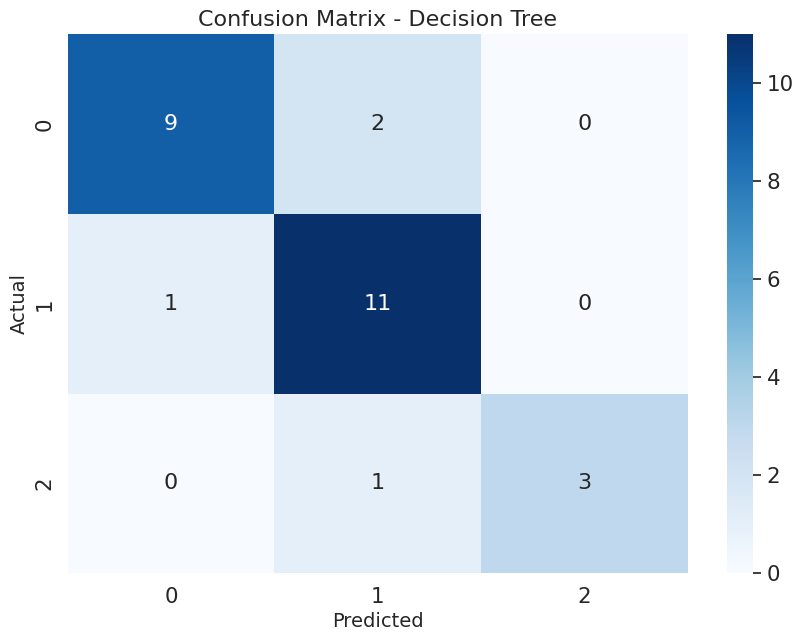

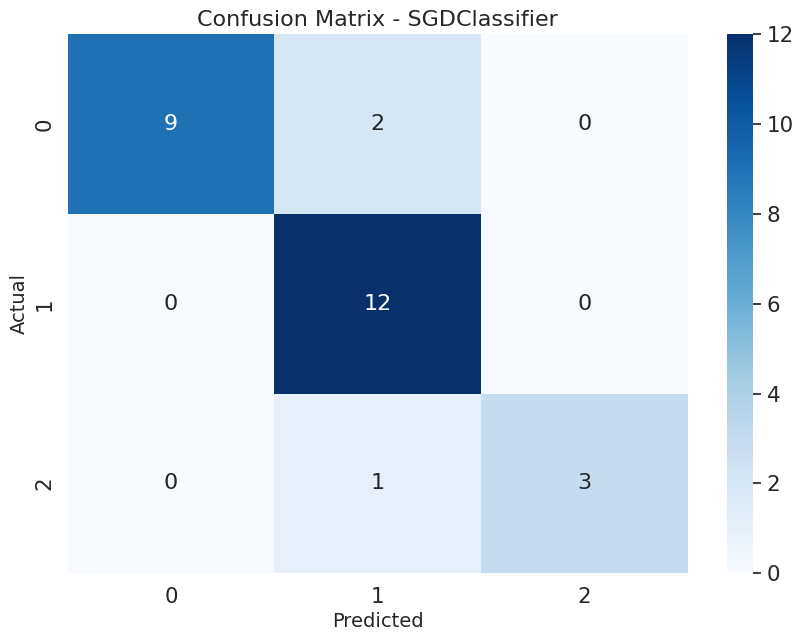

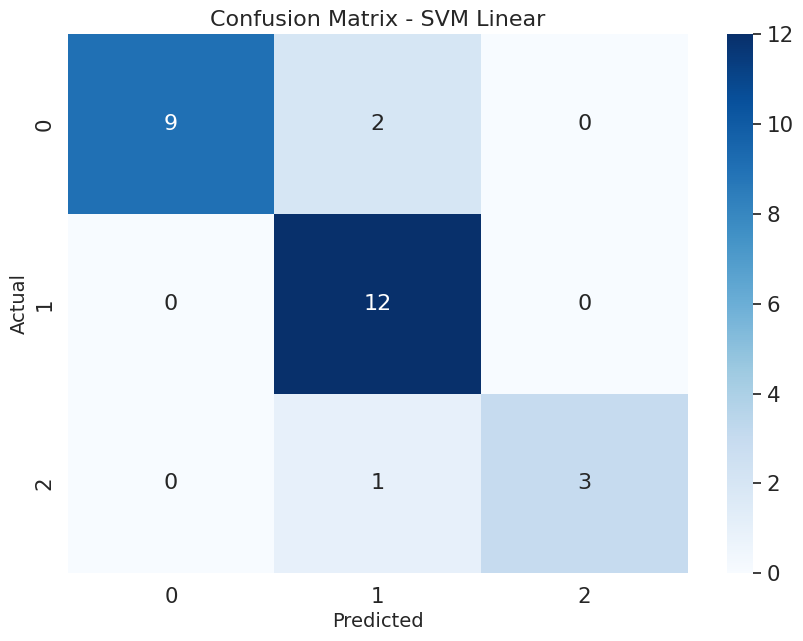

In [48]:
# Plotar para cada modelo
plot_confusion_matrix(y_test, y_pred_dt, "Decision Tree")
plot_confusion_matrix(y_test, y_pred_sgd, "SGDClassifier")
plot_confusion_matrix(y_test, y_pred_svc, "SVM Linear")

# Testando os modelos com frases próprias

In [49]:
# Função para testar os modelos com novas frases
def test_models(new_texts):
    # Lematizar e vetorializar os novos textos
    new_texts_lematized = [lemmatize_text(text) for text in new_texts]
    X_new = vectorizer.transform(new_texts_lematized)

    # Previsões dos modelos
    dt_predictions = clf_dt.predict(X_new)
    sgd_predictions = clf_sgd.predict(X_new)
    svm_predictions = clf_svc.predict(X_new)

    # Decodificar as previsões
    dt_predictions = label_encoder.inverse_transform(dt_predictions)
    sgd_predictions = label_encoder.inverse_transform(sgd_predictions)
    svm_predictions = label_encoder.inverse_transform(svm_predictions)

    return dt_predictions, sgd_predictions, svm_predictions

# Exemplos de novas frases para testar
new_texts = [
    "Funcionário não recebeu o pagamento de horas extras.",
    "Acusado de tráfico de drogas em operação policial.",
    "Conflito sobre os termos de um contrato de prestação de serviços.",
    "Empregado processa empresa por discriminação racial.",
    "Julgamento de fraude em investimentos imobiliários."
]

# Testar os modelos com os novos textos
dt_results, sgd_results, svm_results = test_models(new_texts)

# Exibir os resultados
print("Resultados com o modelo de Árvore de Decisão:")
for text, result in zip(new_texts, dt_results):
    print(f"Frase: '{text}' - Classificação: {result}")

print("\nResultados com o modelo de SGDClassifier:")
for text, result in zip(new_texts, sgd_results):
    print(f"Frase: '{text}' - Classificação: {result}")

print("\nResultados com o modelo SVM:")
for text, result in zip(new_texts, svm_results):
    print(f"Frase: '{text}' - Classificação: {result}")

Resultados com o modelo de Árvore de Decisão:
Frase: 'Funcionário não recebeu o pagamento de horas extras.' - Classificação: Trabalhista
Frase: 'Acusado de tráfico de drogas em operação policial.' - Classificação: Criminal
Frase: 'Conflito sobre os termos de um contrato de prestação de serviços.' - Classificação: Cível
Frase: 'Empregado processa empresa por discriminação racial.' - Classificação: Trabalhista
Frase: 'Julgamento de fraude em investimentos imobiliários.' - Classificação: Criminal

Resultados com o modelo de SGDClassifier:
Frase: 'Funcionário não recebeu o pagamento de horas extras.' - Classificação: Trabalhista
Frase: 'Acusado de tráfico de drogas em operação policial.' - Classificação: Criminal
Frase: 'Conflito sobre os termos de um contrato de prestação de serviços.' - Classificação: Cível
Frase: 'Empregado processa empresa por discriminação racial.' - Classificação: Trabalhista
Frase: 'Julgamento de fraude em investimentos imobiliários.' - Classificação: Criminal

Resu